In [23]:
import sympy
from qadence import RX, RY, RZ, CNOT, Z, run, chain, kron, FeatureParameter, VariationalParameter

phi = FeatureParameter("phi")
theta = VariationalParameter("theta")

block = chain(
    kron(
        RX(0, phi/theta),
        RY(1, theta*2),
        RZ(2, sympy.cos(phi)),
    ),
    kron(
        RX(0, phi),
        RY(1, theta),
        RZ(2, phi),
    ),
    kron(
        RX(0, phi),
        RY(1, theta),
        RZ(2, phi),
    ),
    kron(
        RX(0, phi + theta),
        RY(1, theta**2),
        RZ(2, sympy.cos(phi)),
    ),
    chain(CNOT(0,1), CNOT(1,2))
)
block.tag = "Rotations"

obs = 2*kron(*map(Z, range(3)))
block = chain(block, obs)



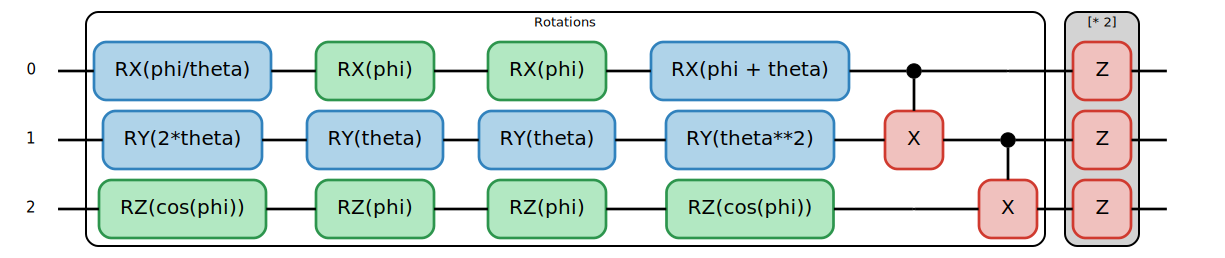

In [24]:
from qadence.draw import display
display(block)